![jupyter](./tasks/task4.png)

In [1]:
import math
import random
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from prettytable import PrettyTable

np.set_printoptions(precision=7, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)

In [2]:
x = [6, 2, 4, 5, 5, 4, 6, 5, 6, 4, 5, 4, 6, 8, 4, 3, 5, 7, 3, 4, 2, 8, 4, 4, 6, 6, 4, 5, 5, 4, 5, 6, 5, 6, 7, 4, 6,
 4, 3, 7, 3, 3, 7, 5, 6, 4, 4, 5, 4, 3, 6, 4, 4, 5, 5, 5, 5, 3, 7, 6, 5, 4, 6, 3, 3, 4, 3, 4, 4, 5, 6, 4, 5, 6,
 5, 5, 6, 5, 4, 5, 4, 4, 3, 5, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 4, 4, 6, 6, 4, 6, 5, 3, 5, 6, 6, 2, 4, 5, 6, 3, 5,
 3, 5, 2, 6, 6, 5, 4, 7, 6, 4, 6, 6, 3, 5, 4, 4, 6, 5, 5, 4, 5, 6, 4, 5, 6, 5, 5, 6, 7, 5, 7, 6, 4, 6, 6, 5, 6,
 6, 4, 3, 4, 5, 7, 4, 5, 7, 6, 4, 5, 4, 5, 4, 6, 6, 4, 6, 5, 4, 5, 6, 5, 3, 5, 3, 4, 6, 8, 4, 5]

k = 8
n = 180
print("Выборка:")
print("x =", x)

Выборка:
x = [6, 2, 4, 5, 5, 4, 6, 5, 6, 4, 5, 4, 6, 8, 4, 3, 5, 7, 3, 4, 2, 8, 4, 4, 6, 6, 4, 5, 5, 4, 5, 6, 5, 6, 7, 4, 6, 4, 3, 7, 3, 3, 7, 5, 6, 4, 4, 5, 4, 3, 6, 4, 4, 5, 5, 5, 5, 3, 7, 6, 5, 4, 6, 3, 3, 4, 3, 4, 4, 5, 6, 4, 5, 6, 5, 5, 6, 5, 4, 5, 4, 4, 3, 5, 6, 5, 5, 6, 6, 4, 4, 6, 6, 5, 4, 4, 6, 6, 4, 6, 5, 3, 5, 6, 6, 2, 4, 5, 6, 3, 5, 3, 5, 2, 6, 6, 5, 4, 7, 6, 4, 6, 6, 3, 5, 4, 4, 6, 5, 5, 4, 5, 6, 4, 5, 6, 5, 5, 6, 7, 5, 7, 6, 4, 6, 6, 5, 6, 6, 4, 3, 4, 5, 7, 4, 5, 7, 6, 4, 5, 4, 5, 4, 6, 6, 4, 6, 5, 4, 5, 6, 5, 3, 5, 3, 4, 6, 8, 4, 5]


In [3]:
# Задание 1

K = sum(x)
print("Статистика K =",K)

Статистика K = 880


![jupyter](./pictures/task4-pic1.png)
![jupyter](./pictures/task4-pic2.png)

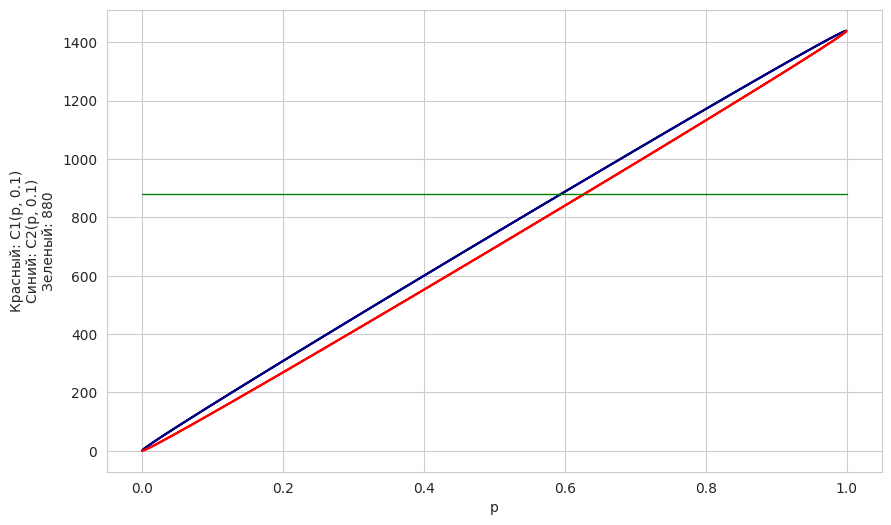

In [4]:
sb.set_style('whitegrid')

plt.figure(figsize=(10, 6))
px = np.arange(0, 1, 0.0001)
y1 = sp.stats.binom.ppf(0.9, n * k, px)
y2 = sp.stats.binom.ppf(0.1, n * k, px)
plt.plot(px, y1, color = 'navy')
plt.plot(px, y2, color = 'red')
plt.step([0,1],[K,K], linewidth = 1, color = "green")
plt.xlabel('p')
plt.ylabel('Красный: C1(p, 0.1)\nСиний: C2(p, 0.1)\nЗеленый: 880')
plt.show()

In [5]:
alpha1 = 0.1
p_down1 = sp.special.betaincinv(K, n * k - K + 1, alpha1 / 2)
p_up1 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha1 / 2))


alpha2 = 0.05
p_down2 = sp.special.betaincinv(K, n * k - K + 1, alpha2 / 2)
p_up2 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha2 / 2))


alpha3 = 0.02
p_down3 = sp.special.betaincinv(K, n * k - K + 1, alpha3 / 2)
p_up3 = sp.special.betaincinv(K + 1, n * k - K, 1 - (alpha3 / 2))

th = ["alpha", alpha1, alpha2, alpha3]
td = np.array(["p_down", p_down1, p_down2, p_down3,
     "p_up", p_up1, p_up2, p_up3])
print("Симметричные интервальные оценки Клоппера-Пирсона для вероятности успеха в одном испытании p")
print_table(th, td)
print("Истинное значение p = 0.6 лежит в промежутке от p_down до p_up для разных alpha")

Симметричные интервальные оценки Клоппера-Пирсона для вероятности успеха в одном испытании p
+--------+--------------------+--------------------+--------------------+
| alpha  |        0.1         |        0.05        |        0.02        |
+--------+--------------------+--------------------+--------------------+
| p_down | 0.5894784770864632 | 0.5853789244412836 | 0.5806027941812529 |
|  p_up  | 0.6324073918087402 | 0.6363889889736587 | 0.6410024238739485 |
+--------+--------------------+--------------------+--------------------+
Истинное значение p = 0.6 лежит в промежутке от p_down до p_up для разных alpha


In [7]:
# Задание 2

par = K / (k * n)
av = K / n

alpha1 = 0.1
alpha2 = 0.05
alpha3 = 0.02

u1 = sp.stats.norm.ppf(1 - alpha1 / 2)
u2 = sp.stats.norm.ppf(1 - alpha2 / 2)
u3 = sp.stats.norm.ppf(1 - alpha3 / 2)

pl1 = (av - u1 * np.sqrt(k * par * (1 - par) / n)) / k
pr1 = (av + u1 * np.sqrt(k * par * (1 - par) / n)) / k

pl2 = (av - u2 * np.sqrt(k * par * (1 - par) / n)) / k
pr2 = (av + u2 * np.sqrt(k * par * (1 - par) / n)) / k

pl3 = (av - u3 * np.sqrt(k * par * (1 - par) / n)) / k
pr3 = (av + u3 * np.sqrt(k * par * (1 - par) / n)) / k

th = ["alpha", alpha1, alpha2, alpha3]
td = np.array(["p_left", pl1, pl2, pl3,
     "p_right", pr1, pr2, pr3])
print("Приближенные доверительные интервалы для p (по ЦПТ)")
print_table(th, td)
print("Истинное значение p = 0.6 лежит в промежутке от p_left до p_right для разных alpha по ЦПТ")

Приближенные доверительные интервалы для p (по ЦПТ)
+---------+--------------------+--------------------+--------------------+
|  alpha  |        0.1         |        0.05        |        0.02        |
+---------+--------------------+--------------------+--------------------+
|  p_left | 0.5899801686121878 | 0.5859320401113192 | 0.5812252158840948 |
| p_right | 0.6322420536100345 | 0.6362901821109032 | 0.6409970063381275 |
+---------+--------------------+--------------------+--------------------+
Истинное значение p = 0.6 лежит в промежутке от p_left до p_right для разных alpha по ЦПТ


+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|           pl1 = 0.564           |   0    |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |
+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Вероятность по формуле Бернулли | 0.0013 | 0.0134 | 0.0608 | 0.1578 | 0.2557 | 0.2652 | 0.1719 | 0.0637 | 0.0103 |
|     Кумулятивная вероятность    | 0.0013 | 0.0147 | 0.0755 | 0.2333 | 0.489  | 0.7541 | 0.926  | 0.9897 |  1.0   |
+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
+---------------------------------+--------+--------+--------+--------+--------+--------+--------+--------+-------+
|           pr1 = 0.658           |   0    |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8   |
+---------------------------------+--------+--------+--------+----

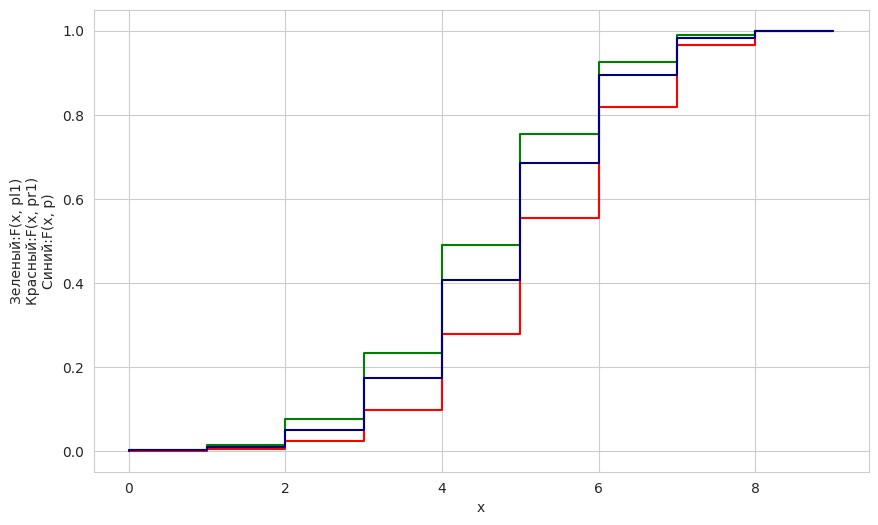

In [27]:
def cumulativeProbability(prob):
    cumulativeProb = np.array([])
    s = 0
    for element in prob:
        s += element
        cumulativeProb = np.append(cumulativeProb, s) 
        
    return cumulativeProb

def bernuliProbability(p):
    prob = np.array([])
    for i in range(k + 1):
        prob = np.append(prob, math.comb(k,i) * p ** i * (1 - p) ** (k - i))
    
    return prob

plt.figure(figsize=(10,6))
rg = np.arange(0,10,1)

prob_pl1 = bernuliProbability(pl1)
cumulativeProb_pl1 = cumulativeProbability(prob_pl1)
plt.step(rg,[0] + cumulativeProb_pl1.tolist() , color = 'green')

prob_pr1 = bernuliProbability(pr1)
cumulativeProb_pr1 = cumulativeProbability(prob_pr1)
plt.step(rg,[0] + cumulativeProb_pr1.tolist(), color = 'red')

prob_p = bernuliProbability(0.6)
cumulativeProb_p = cumulativeProbability(prob_p)
plt.step(rg,[0] + cumulativeProb_p.tolist(), color = 'navy')

th = ["pl1 = 0.564", 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = np.array(["Вероятность по формуле Бернулли"])
td = np.append(td, np.around(prob_pl1, 4))
td = np.append(td, "Кумулятивная вероятность")
td = np.append(td, np.around(cumulativeProb_pl1, 4))
print_table(th, td)

th = ["pr1 = 0.658", 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = np.array(["Вероятность по формуле Бернулли"])
td = np.append(td, np.around(prob_pr1, 4))
td = np.append(td, "Кумулятивная вероятность")
td = np.append(td, np.around(cumulativeProb_pr1, 4))
print_table(th, td)

th = ["p = 0.6", 0, 1, 2, 3, 4, 5, 6, 7, 8]
td = np.array(["Вероятность по формуле Бернулли"])
td = np.append(td, np.around(prob_p, 4))
td = np.append(td, "Кумулятивная вероятность")
td = np.append(td, np.around(cumulativeProb_p, 4))
print_table(th, td)

plt.xlabel("x")
plt.ylabel("Зеленый:F(x, pl1)\nКрасный:F(x, pr1)\nСиний:F(x, p)")
plt.show()

In [30]:
print("Вывод: в результате оценки параметра p, интеравальная оценка Клоппера-Пирсона дает более узкие интервалы, нежели\nприближенные доверительные интервалы.")

Вывод: в результате оценки параметра p, интеравальная оценка Клоппера-Пирсона дает более узкие интервалы, нежели
приближенные доверительные интервалы.
